# Cardiovascular Disease - dataset analysis

#### Student info:
- Name: Semenova Ekaterina
- Group: MMP212
- Email: ebsemenova@edu.hse.ru
- Date: 26.10.2022

#### <code>[Data source](https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset)
</code>

#### Features:
<ol>
<li>Age | Objective Feature | age | int (days)</li>
<li>Height | Objective Feature | height | int (cm) |</li>
<li>Weight | Objective Feature | weight | float (kg) |</li>
<li>Gender | Objective Feature | gender | categorical code (1 - woman, 2 - man) |</li>
<li>Systolic blood pressure | Examination Feature | ap_hi | int |</li>
<li>Diastolic blood pressure | Examination Feature | ap_lo | int |</li>
<li>Cholesterol | Examination Feature | cholesterol | (1 - normal, 2 - above normal, 3 - well above normal) |</li>
<li>Glucose | Examination Feature | gluc | (1 - normal, 2 - above normal, 3 - well above normal) |</li>
<li>Smoking | Subjective Feature | smoke | binary (1 - yes, 2 - no) |</li>
<li>Alcohol intake | Subjective Feature | alco | binary (1 - yes, 2 - no) |</li>
<li>Physical activity | Subjective Feature | active | binary (1 - yes, 2 - no) |</li>
<li>Presence or absence of cardiovascular disease | Target Variable | cardio | binary (1 - yes, 2 - no) |</li>
</ol> 

### Импорт данных и их первичный анализ

In [332]:
#Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [333]:
#Импортируем данные из формата .csv, первый столбец назначаем как ID и выводим первые 5 строк датафрейма 
cardio = pd.read_csv('cardio_train.csv', sep=';')
cardio = cardio.set_index('id')
cardio.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [334]:
cardio.shape #Видим что наш датафрейм имеет размерность 70 000 наблюдений на 13 колонок

(70000, 12)

In [335]:
#Выводим общую информацию об исследуемых 12 объектах в датафрейме. 
#Видим, что пропущенных значений в датасе нет. 
cardio.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [336]:
#Выведем таблицу в дескриптивными статистиками для количественных переменных - возраст, рост, вес, давление (сист, диаст) 
cardio[['age', 'height', 'weight', 'ap_hi', 'ap_lo']].describe() 
#Заметим, что в данных содержатся аномальные значения, с которыми предстоит дальнейшая работа

,age,height,weight,ap_hi,ap_lo
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,164.359229,74.205690,128.817286,96.630414
std,2467.251667,8.210126,14.395757,154.011419,188.472530
min,10798.000000,55.000000,10.000000,-150.000000,-70.000000
25%,17664.000000,159.000000,65.000000,120.000000,80.000000
50%,19703.000000,165.000000,72.000000,120.000000,80.000000
75%,21327.000000,170.000000,82.000000,140.000000,90.000000
max,23713.000000,250.000000,200.000000,16020.000000,11000.000000


### Преобразование и создание новых переменных

Из первичного анализа данных стоит заметить, что в рамках текущей задачи ряд переменных требует преобразования*:    
- Значения переменной возраста необходимо перевести из кол-ва дней в кол-во лет жизни исследуемого пациента.  
- Для удобства, также, перекодируем переменную уровня глюкозы **gluc** в категориальную переменную со текстовыми содержательными значениями вместо числовых.  

Также, на основе ряда переменных можно рассчитать медицинские индексы и показатели здоровья человека:  
- На основе показателей роста **height** и веса **weight** пациента можно расчитать индекс массы тела человека (ИМТ). 
- На основе переменных систолического **ap_hi** и диастолического **ap_lo** давлений, а также возраста **age** человека можно суть о норме давления. 

###### *Для удобства анализа взаимосвязей переменных мы переведем все категориальные переменных, содержащие числовые значения (0,1,2,3,...) в содержащие текстовые сожержательные переменные (Норма, Выше нормы, и т.д.). Для нашего последующего функционального анализа зависимостей между категориальными переменными мы будем вынуждены обратно перевести все категориальные переменные в dummy-переменные, содержащие бинарные значения (1,0). 


In [337]:
#Видим, что значения показателя возраста представлены в датасете в виде количетсва дней. 
#Переведем эти значения из дневного формата в годовой, разделив значения столбцы age на 365 дней в году.
#Перезапишем переменную с приблизительным возрастом пациента. Пренебрегаем неточностью дней в году из-за отсутсвия знания года рождения пациента.
cardio['age'] = round(cardio['age'] / 365)
cardio.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0


In [338]:
#Переформатируем категориальную переменную пола пациента в вид, содержащий текстовую категорию - мужчина, женщина. 
cardio['gender'] = np.where((cardio['gender'] == 1), 'Женщина', 'Мужчина')
cardio.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50.0,Мужчина,168,62.0,110,80,1,1,0,0,1,0
1,55.0,Женщина,156,85.0,140,90,3,1,0,0,1,1
2,52.0,Женщина,165,64.0,130,70,3,1,0,0,0,1
3,48.0,Мужчина,169,82.0,150,100,1,1,0,0,1,1
4,48.0,Женщина,156,56.0,100,60,1,1,0,0,0,0


In [339]:
cardio['gender'].value_counts(normalize=True) #65% продиагностированных пациентов - мужчины, а 35% - женщины

Женщина    0.650429
Мужчина    0.349571
Name: gender, dtype: float64

In [340]:
#Создадим новую переменную ИМТ (англ. BMI, "индекс массы тела"), выразив ее из переменных роста и веса пациента.
cardio['bmi'] = cardio['weight'] / (cardio['height'] / 100 )**2 
cardio.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
id,,,,,,,,,,,,,
0,50.0,Мужчина,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55.0,Женщина,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,52.0,Женщина,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48.0,Мужчина,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,48.0,Женщина,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [341]:
#Кодируем новую количественную переменную ИМТ в категориальную. 
#Используем отдельную функцию вместо встроенной lambda, так как функция сложная с несколькими условиями.
def get_bmi_cat(bmi):
    if bmi < 16: 
        return 'Выраженный дефицит'
    elif bmi < 18.5:
        return 'Дефицит'
    elif bmi < 25:
        return 'Норма'
    elif bmi < 30:
        return 'Предожирение'
    elif bmi < 35:
        return 'Ожирение 1 степени'
    elif bmi < 40:
        return 'Ожирение 2 степени'
    elif bmi >= 40:
        return 'Ожирение 3 степени'
    else:
        return bmi

In [342]:
#Записываем значения функции в новую категориальную переменную bmi category
cardio['bmi_category'] = cardio['bmi'].apply(get_bmi_cat)
cardio.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_category
id,,,,,,,,,,,,,,
0,50.0,Мужчина,168,62.0,110,80,1,1,0,0,1,0,21.967120,Норма
1,55.0,Женщина,156,85.0,140,90,3,1,0,0,1,1,34.927679,Ожирение 1 степени
2,52.0,Женщина,165,64.0,130,70,3,1,0,0,0,1,23.507805,Норма
3,48.0,Мужчина,169,82.0,150,100,1,1,0,0,1,1,28.710479,Предожирение
4,48.0,Женщина,156,56.0,100,60,1,1,0,0,0,0,23.011177,Норма


In [343]:
cardio['bmi_category'].value_counts(normalize=True) 
# Видим, что только 37% пациентов имеют конституцию в рамках нормы.
# ~35% - находятся в состоянии предожирения,  то есть имеют избыточную массу тела
# ~26% - диагностирована определенная степень ожирения.
# И лишь менее 1% пациентов имеею недостаток массы тела.

Норма                 0.368429
Предожирение          0.358371
Ожирение 1 степени    0.174457
Ожирение 2 степени    0.062514
Ожирение 3 степени    0.026943
Дефицит               0.008429
Выраженный дефицит    0.000857
Name: bmi_category, dtype: float64

In [344]:
#Преобразуем переменную уровня глюкозы
#Используем отдельную функцию вместо встроенной lambda, так как функция сложная с несколькими условиями.
def get_gluc_cat(gluc):
    if gluc == 1: 
        return 'Норма'
    elif gluc == 2:
        return 'Выше нормы'
    elif gluc == 3:
        return 'Значительно выше нормы'
    else:
        return gluc

In [345]:
#Записываем значения функции в новую категориальную переменную gluc category
cardio['gluc'] = cardio['gluc'].apply(get_gluc_cat)
cardio.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_category
id,,,,,,,,,,,,,,
0,50.0,Мужчина,168,62.0,110,80,1,Норма,0,0,1,0,21.967120,Норма
1,55.0,Женщина,156,85.0,140,90,3,Норма,0,0,1,1,34.927679,Ожирение 1 степени
2,52.0,Женщина,165,64.0,130,70,3,Норма,0,0,0,1,23.507805,Норма
3,48.0,Мужчина,169,82.0,150,100,1,Норма,0,0,1,1,28.710479,Предожирение
4,48.0,Женщина,156,56.0,100,60,1,Норма,0,0,0,0,23.011177,Норма


In [346]:
cardio['gluc'].value_counts(normalize=True)
# У 85% пациентов уровень глюкозы в состоянии нормы
# У оставшихся 15% - уровень выше нормы и значительно выше нормы в равной степени

Норма                     0.849700
Значительно выше нормы    0.076157
Выше нормы                0.074143
Name: gluc, dtype: float64

In [347]:
#Аналогично преобразуем переменную уровня холестирина
#Используем отдельную функцию вместо встроенной lambda, так как функция сложная с несколькими условиями.
def get_chol_cat(cholesterol):
    if cholesterol == 1: 
        return 'Норма'
    elif cholesterol == 2:
        return 'Выше нормы'
    elif cholesterol == 3:
        return 'Значительно выше нормы'
    else:
        return cholesterol

In [348]:
#Записываем значения функции в категориальную переменную cholesterol
cardio['cholesterol'] = cardio['cholesterol'].apply(get_chol_cat)
cardio.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_category
id,,,,,,,,,,,,,,
0,50.0,Мужчина,168,62.0,110,80,Норма,Норма,0,0,1,0,21.967120,Норма
1,55.0,Женщина,156,85.0,140,90,Значительно выше нормы,Норма,0,0,1,1,34.927679,Ожирение 1 степени
2,52.0,Женщина,165,64.0,130,70,Значительно выше нормы,Норма,0,0,0,1,23.507805,Норма
3,48.0,Мужчина,169,82.0,150,100,Норма,Норма,0,0,1,1,28.710479,Предожирение
4,48.0,Женщина,156,56.0,100,60,Норма,Норма,0,0,0,0,23.011177,Норма


In [349]:
cardio['cholesterol'].value_counts(normalize=True)
# У 75% пациентов уровень холестирина в состоянии нормы
# У оставшихся 25% - уровень выше нормы и значительно выше нормы в практически равной степени

Норма                     0.748357
Выше нормы                0.136414
Значительно выше нормы    0.115229
Name: cholesterol, dtype: float64

In [350]:
cardio.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_category
id,,,,,,,,,,,,,,
0,50.0,Мужчина,168,62.0,110,80,Норма,Норма,0,0,1,0,21.967120,Норма
1,55.0,Женщина,156,85.0,140,90,Значительно выше нормы,Норма,0,0,1,1,34.927679,Ожирение 1 степени
2,52.0,Женщина,165,64.0,130,70,Значительно выше нормы,Норма,0,0,0,1,23.507805,Норма
3,48.0,Мужчина,169,82.0,150,100,Норма,Норма,0,0,1,1,28.710479,Предожирение
4,48.0,Женщина,156,56.0,100,60,Норма,Норма,0,0,0,0,23.011177,Норма


In [351]:
# Временно раскодирываем бинарные переменные для удобства анализа
cardio['smoke'] = cardio['smoke'].apply(lambda x: 'да' if x == 1 else 'нет')
cardio['alco'] = cardio['alco'].apply(lambda x: 'да' if x == 1 else 'нет')
cardio['active'] = cardio['active'].apply(lambda x: 'да' if x == 1 else 'нет')
cardio['cardio'] = cardio['cardio'].apply(lambda x: 'да' if x == 1 else 'нет')

In [352]:
cardio['smoke'].value_counts(normalize=True)
#91% пациентов из опрошенных не курит

нет    0.911871
да     0.088129
Name: smoke, dtype: float64

In [353]:
cardio['alco'].value_counts(normalize=True)
#94% пациентов из опрешенных не употребляет алкоголь

нет    0.946229
да     0.053771
Name: alco, dtype: float64

In [354]:
cardio['active'].value_counts(normalize=True)
#80% пациентов ведут активный образ жизни или занимаются спортом

да     0.803729
нет    0.196271
Name: active, dtype: float64

In [355]:
cardio['cardio'].value_counts(normalize=True)
# Опрошенные в равных долях имеют и не имеют сердечно-сосудистые заболевания (50% на 50%)

нет    0.5003
да     0.4997
Name: cardio, dtype: float64

In [356]:
cardio.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_category
id,,,,,,,,,,,,,,
0,50.0,Мужчина,168,62.0,110,80,Норма,Норма,нет,нет,да,нет,21.967120,Норма
1,55.0,Женщина,156,85.0,140,90,Значительно выше нормы,Норма,нет,нет,да,да,34.927679,Ожирение 1 степени
2,52.0,Женщина,165,64.0,130,70,Значительно выше нормы,Норма,нет,нет,нет,да,23.507805,Норма
3,48.0,Мужчина,169,82.0,150,100,Норма,Норма,нет,нет,да,да,28.710479,Предожирение
4,48.0,Женщина,156,56.0,100,60,Норма,Норма,нет,нет,нет,нет,23.011177,Норма


In [357]:
#Создаем новую переменную нормы давления на основе показателей систолического и диастолического давлений.
#Используем отдельную функцию вместо встроенной lambda, так как функция сложная с несколькими условиями.
def get_ap_hi_cat(ap_hi):
    if ap_hi < 120: 
        return 'Оптимальное'
    elif ap_hi < 130:
        return 'Нормальное'
    elif ap_hi < 140:
        return 'Предгипертония'
    elif ap_hi < 160:
        return 'Гипертония 1 степени'
    elif ap_hi < 180:
        return 'Гипертония 2 степени'
    elif ap_hi >= 180:
        return 'Гипертония 3 степени'
    else:
        return ap_hi

In [358]:
#Записываем значения функции в категориальную переменную cholesterol
cardio['ap_hi_category'] = cardio['ap_hi'].apply(get_ap_hi_cat)
cardio.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_category,ap_hi_category
id,,,,,,,,,,,,,,,
0,50.0,Мужчина,168,62.0,110,80,Норма,Норма,нет,нет,да,нет,21.967120,Норма,Оптимальное
1,55.0,Женщина,156,85.0,140,90,Значительно выше нормы,Норма,нет,нет,да,да,34.927679,Ожирение 1 степени,Гипертония 1 степени
2,52.0,Женщина,165,64.0,130,70,Значительно выше нормы,Норма,нет,нет,нет,да,23.507805,Норма,Предгипертония
3,48.0,Мужчина,169,82.0,150,100,Норма,Норма,нет,нет,да,да,28.710479,Предожирение,Гипертония 1 степени
4,48.0,Женщина,156,56.0,100,60,Норма,Норма,нет,нет,нет,нет,23.011177,Норма,Оптимальное


In [359]:
cardio['ap_hi_category'].value_counts(normalize=True)
#40% пациентов имеет нормальное верхнее давление
#18% - пониженное давление
#42% - имеют гипертонию, то есть повышенное давление

Нормальное              0.404114
Гипертония 1 степени    0.206229
Оптимальное             0.186257
Предгипертония          0.132471
Гипертония 2 степени    0.055729
Гипертония 3 степени    0.015200
Name: ap_hi_category, dtype: float64

In [360]:
def get_ap_lo_cat(ap_lo):
    if ap_lo < 80: 
        return 'Оптимальное'
    elif ap_lo < 85:
        return 'Нормальное'
    elif ap_lo < 90:
        return 'Предгипертония'
    elif ap_lo < 100:
        return 'Гипертония 1 степени'
    elif ap_lo < 110:
        return 'Гипертония 2 степени'
    elif ap_lo >= 110:
        return 'Гипертония 3 степени'
    else:
        return ap_lo

In [361]:
#Записываем значения функции в категориальную переменную cholesterol
cardio['ap_lo_category'] = cardio['ap_lo'].apply(get_ap_lo_cat)
cardio.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_category,ap_hi_category,ap_lo_category
id,,,,,,,,,,,,,,,,
0,50.0,Мужчина,168,62.0,110,80,Норма,Норма,нет,нет,да,нет,21.967120,Норма,Оптимальное,Нормальное
1,55.0,Женщина,156,85.0,140,90,Значительно выше нормы,Норма,нет,нет,да,да,34.927679,Ожирение 1 степени,Гипертония 1 степени,Гипертония 1 степени
2,52.0,Женщина,165,64.0,130,70,Значительно выше нормы,Норма,нет,нет,нет,да,23.507805,Норма,Предгипертония,Оптимальное
3,48.0,Мужчина,169,82.0,150,100,Норма,Норма,нет,нет,да,да,28.710479,Предожирение,Гипертония 1 степени,Гипертония 2 степени
4,48.0,Женщина,156,56.0,100,60,Норма,Норма,нет,нет,нет,нет,23.011177,Норма,Оптимальное,Оптимальное


In [362]:
cardio['ap_lo_category'].value_counts(normalize=True)
#50% пациентов имеет нормальное нижнее давление
#21% - пониженное давление
#29% - имеют гипертонию, то есть повышенное давление

Нормальное              0.499471
Гипертония 1 степени    0.208743
Оптимальное             0.201657
Гипертония 2 степени    0.059129
Гипертония 3 степени    0.024043
Предгипертония          0.006957
Name: ap_lo_category, dtype: float64

### Работа с выбросами и другими аномальными значениями

In [363]:
#После преобразования переменных и создания новых еще раз выведем сводную таблицу с дескриптивными статистиками.
cardio[['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi']].describe() 

,age,height,weight,ap_hi,ap_lo,bmi
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.338686,164.359229,74.205690,128.817286,96.630414,27.556513
std,6.765294,8.210126,14.395757,154.011419,188.472530,6.091511
min,30.000000,55.000000,10.000000,-150.000000,-70.000000,3.471784
25%,48.000000,159.000000,65.000000,120.000000,80.000000,23.875115
50%,54.000000,165.000000,72.000000,120.000000,80.000000,26.374068
75%,58.000000,170.000000,82.000000,140.000000,90.000000,30.222222
max,65.000000,250.000000,200.000000,16020.000000,11000.000000,298.666667


Заметим, что в датасете содержатся данные о пациентах от 30 до 65 лет. 
В датасете наблюдаются аномальные значения в переменных роста (минимум - 8 см, максимум - 250 см), систолического давления (минимальное значение - отрицательное), а также диастолического давление (минимальное значение отрицательно). Данные наблюдения необходимо будет отдельно проанализировать на наличие выбросов. 

In [364]:
#Построим графики "ящик с усами" для всех количественных переменных, чтобы визуально оценить наличие выбросов.

Text(0.5, 0.98, 'Boxplots for the numerical variables')

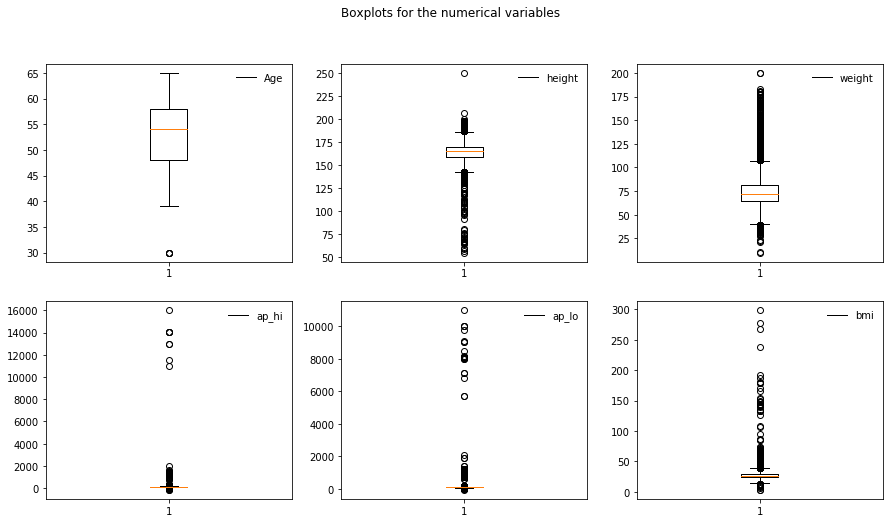

In [365]:
fig, ax = plt.subplots(2,3, figsize=(15,8))

ax[0][0].boxplot(cardio['age'])
ax[0][1].boxplot(cardio['height'])
ax[0][2].boxplot(cardio['weight'])
ax[1][0].boxplot(cardio['ap_hi'])
ax[1][1].boxplot(cardio['ap_lo'])
ax[1][2].boxplot(cardio['bmi'])

ax[0][0].legend(['Age'], frameon=False)
ax[0][1].legend(['height'], frameon=False)
ax[0][2].legend(['weight'], frameon=False)
ax[1][0].legend(['ap_hi'], frameon=False)
ax[1][1].legend(['ap_lo'], frameon=False)
ax[1][2].legend(['bmi'], frameon=False)

fig.suptitle('Boxplots for the numerical variables')

#Видим, что большинство переменных содержит значительное количество выбросов, находящихся за пределами от среднего значения более черз на 3*сигма.
#Для поиска аномальных значений в датасете будем использовать среднекв. отклонение от среднего на 3 сигмы.

In [366]:
#Найдем выбросы для переменной возраста
mean_age = cardio['age'].mean()
std_age = cardio['age'].std()
std_threshold_bottom_age = mean_age - 3 * std_age
std_threshold_top_age = mean_age + 3 * std_age
print(std_threshold_bottom_age, std_threshold_top_age) 

33.04280369895744 73.63456772961399


In [367]:
#Нахожим кол-во выбросов по переменной age (по верхней границе)
cardio[cardio['age'] > std_threshold_top_age].shape

(0, 16)

In [368]:
#Нахожим кол-во выбросов по переменной age (по нижней границе)
cardio[cardio['age'] < std_threshold_bottom_age].shape

(4, 16)

In [369]:
cardio = cardio[cardio['age'] > std_threshold_bottom_age]
cardio.shape

(69996, 16)

In [370]:
#Найдем выбросы для переменной роста
mean_height = cardio['height'].mean()
std_height = cardio['height'].std()
std_threshold_bottom_height = mean_height - 3 * std_height
std_threshold_top_height = mean_height + 3 * std_height
print(std_threshold_bottom_height, std_threshold_top_height) 

139.72869616686904 188.98943058323096


In [371]:
#Нахожим кол-во выбросов по переменной height (по верхней границе)
cardio[cardio['height'] > std_threshold_top_height].shape

(141, 16)

In [372]:
#Нахожим кол-во выбросов по переменной height (по нижней границе)
cardio[cardio['height'] < std_threshold_bottom_height].shape

(152, 16)

In [373]:
cardio = cardio[cardio['height'] > std_threshold_bottom_height]
cardio = cardio[cardio['height'] < std_threshold_top_height]
cardio.shape

(69703, 16)

In [374]:
#Найдем выбросы для переменной веса
mean_weight = cardio['weight'].mean()
std_weight = cardio['weight'].std()
std_threshold_bottom_weight = mean_weight - 3 * std_weight
std_threshold_top_weight = mean_weight + 3 * std_weight
print(std_threshold_bottom_weight, std_threshold_top_weight) 

31.222380653640187 117.1136077543193


In [375]:
#Нахожим кол-во выбросов по переменной weight (по верхней границе)
cardio[cardio['weight'] > std_threshold_top_weight].shape

(670, 16)

In [376]:
#Нахожим кол-во выбросов по переменной weight (по нижней границе)
cardio[cardio['weight'] < std_threshold_bottom_weight].shape

(9, 16)

In [377]:
cardio = cardio[cardio['weight'] > std_threshold_bottom_weight]
cardio = cardio[cardio['weight'] < std_threshold_top_weight]
cardio.shape

(69024, 16)

In [378]:
# Для корректной оценки выбросов по переменным давления необходимо удалить аномальные отрицательные значения
# А также те значения, которые превышают адекватно возможное значение (более 300 мм рт. ст.)
cardio = cardio[cardio['ap_hi'] > 0]
cardio = cardio[cardio['ap_lo'] > 0]
cardio = cardio[cardio['ap_hi'] < 300]
cardio = cardio[cardio['ap_lo'] < 300]
cardio.shape

(68041, 16)

In [379]:
#Найдем выбросы для переменной ap_hi 
mean_ap_hi = cardio['ap_hi'].mean()
std_ap_hi = cardio['ap_hi'].std()
std_threshold_bottom_ap_hi = mean_ap_hi - 3 * std_ap_hi
std_threshold_top_ap_hi = mean_ap_hi + 3 * std_ap_hi
print(std_threshold_bottom_ap_hi, std_threshold_top_ap_hi) 

73.36418619416811 179.02746001914443


In [380]:
#Нахожим кол-во выбросов по переменной ap_hi (по верхней границе)
cardio[cardio['ap_hi'] > std_threshold_top_ap_hi].shape

(845, 16)

In [381]:
#Нахожим кол-во выбросов по переменной ap_hi (по нижней границе)
cardio[cardio['ap_hi'] < std_threshold_bottom_ap_hi].shape

(190, 16)

In [382]:
cardio = cardio[cardio['ap_hi'] > std_threshold_bottom_ap_hi]
cardio = cardio[cardio['ap_hi'] < std_threshold_top_ap_hi]
cardio.shape

(67006, 16)

In [383]:
#Найдем выбросы для переменной ap_lo 
mean_ap_lo = cardio['ap_lo'].mean()
std_ap_lo = cardio['ap_lo'].std()
std_threshold_bottom_ap_lo = mean_ap_lo - 3 * std_ap_lo
std_threshold_top_ap_lo = mean_ap_lo + 3 * std_ap_lo
print(std_threshold_bottom_ap_lo, std_threshold_top_ap_lo) 

52.87950328186817 109.19108741150258


In [384]:
#Нахожим кол-во выбросов по переменной ap_hi (по верхней границе)
cardio[cardio['ap_lo'] > std_threshold_top_ap_lo].shape

(436, 16)

In [385]:
#Нахожим кол-во выбросов по переменной ap_hi (по нижней границе)
cardio[cardio['ap_lo'] < std_threshold_bottom_ap_lo].shape

(102, 16)

In [386]:
cardio = cardio[cardio['ap_lo'] > std_threshold_bottom_ap_lo]
cardio = cardio[cardio['ap_lo'] < std_threshold_top_ap_lo]
cardio.shape

(66468, 16)

Text(0.5, 0.98, 'Boxplots for the numerical variables')

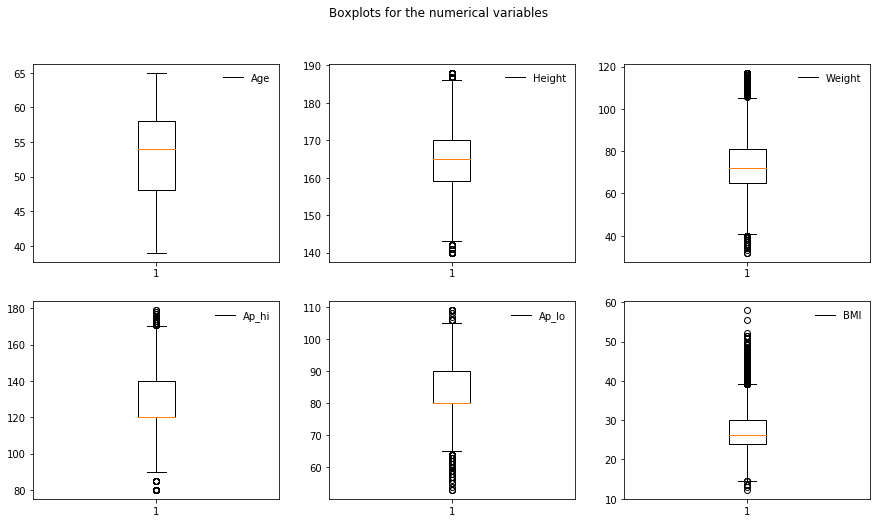

In [387]:
#Построим графики "ящик с усами" для переменных с удаленными выбросами 
#Заметим, что графики стали отображать более адекватную картину по переменным, зачения сгруппированы около ср.значения.
fig, ax = plt.subplots(2,3, figsize=(15,8))

ax[0][0].boxplot(cardio['age'])
ax[0][1].boxplot(cardio['height'])
ax[0][2].boxplot(cardio['weight'])
ax[1][0].boxplot(cardio['ap_hi'])
ax[1][1].boxplot(cardio['ap_lo'])
ax[1][2].boxplot(cardio['bmi'])

ax[0][0].legend(['Age'], frameon=False)
ax[0][1].legend(['Height'], frameon=False)
ax[0][2].legend(['Weight'], frameon=False)
ax[1][0].legend(['Ap_hi'], frameon=False)
ax[1][1].legend(['Ap_lo'], frameon=False)
ax[1][2].legend(['BMI'], frameon=False)

fig.suptitle('Boxplots for the numerical variables')

### Меры центральной тенденции

In [474]:
#Создадим датафреймы отдельно с категориальными и количественными переменными
num_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi']
cat_features = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bmi_category', 'ap_hi_category', 'ap_lo_category', 'cardio']

In [423]:
#Еще раз выведем основные дескриптивные статистики 
cardio.describe()

,age,height,weight,ap_hi,ap_lo,bmi
count,66468.000000,66468.000000,66468.000000,66468.000000,66468.000000,66468.000000
mean,53.306885,164.378799,73.435053,125.640263,80.861241,27.214627
std,6.768307,7.670895,13.128082,15.058566,8.706097,4.824086
min,39.000000,140.000000,32.000000,80.000000,53.000000,12.254473
25%,48.000000,159.000000,65.000000,120.000000,80.000000,23.833005
50%,54.000000,165.000000,72.000000,120.000000,80.000000,26.233556
75%,58.000000,170.000000,81.000000,140.000000,90.000000,29.996713
max,65.000000,188.000000,117.000000,179.000000,109.000000,58.024202


In [388]:
#Заметим, что ср. возраст пациентов после удаления выбросов стал 53 года, и все его значения лежат на расстоянии не более 3*сигма от среднего.
#Средний показатель роста - 165 см
#Средний показатель веса - 73 кг
#Средний показатель верхнего артериального давления - 125 мм.рт.ст.
#Средний показатель нижнего артериального давления - 81 мм.рт.ст.
#Средний показатель индекса массы тела - 27 кг/м²

,age,height,weight,ap_hi,ap_lo,bmi
count,66468.000000,66468.000000,66468.000000,66468.000000,66468.000000,66468.000000
mean,53.306885,164.378799,73.435053,125.640263,80.861241,27.214627
std,6.768307,7.670895,13.128082,15.058566,8.706097,4.824086
min,39.000000,140.000000,32.000000,80.000000,53.000000,12.254473
25%,48.000000,159.000000,65.000000,120.000000,80.000000,23.833005
50%,54.000000,165.000000,72.000000,120.000000,80.000000,26.233556
75%,58.000000,170.000000,81.000000,140.000000,90.000000,29.996713
max,65.000000,188.000000,117.000000,179.000000,109.000000,58.024202


### Корреляция и взаимосвязи между данными
Построим таблицу коэффициентов корреляции между количественными переменными

In [425]:
cardio.corr()

,age,height,weight,ap_hi,ap_lo,bmi
age,1.000000,-0.085267,0.063309,0.217592,0.161556,0.111889
height,-0.085267,1.000000,0.315481,0.015314,0.034280,-0.215505
weight,0.063309,0.315481,1.000000,0.258070,0.240948,0.854407
ap_hi,0.217592,0.015314,0.258070,1.000000,0.719431,0.256842
ap_lo,0.161556,0.034280,0.240948,0.719431,1.000000,0.229111
bmi,0.111889,-0.215505,0.854407,0.256842,0.229111,1.000000


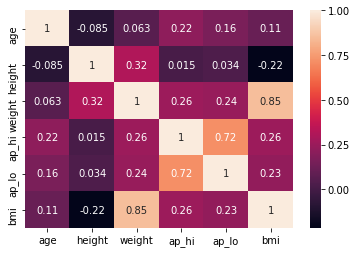

In [427]:
#Построим тепловую карту коэффициентов корреляции для более удобного и визуального представления данных из таблицы выше
import seaborn as sns
ax = sns.heatmap(cardio.corr(), annot=True)

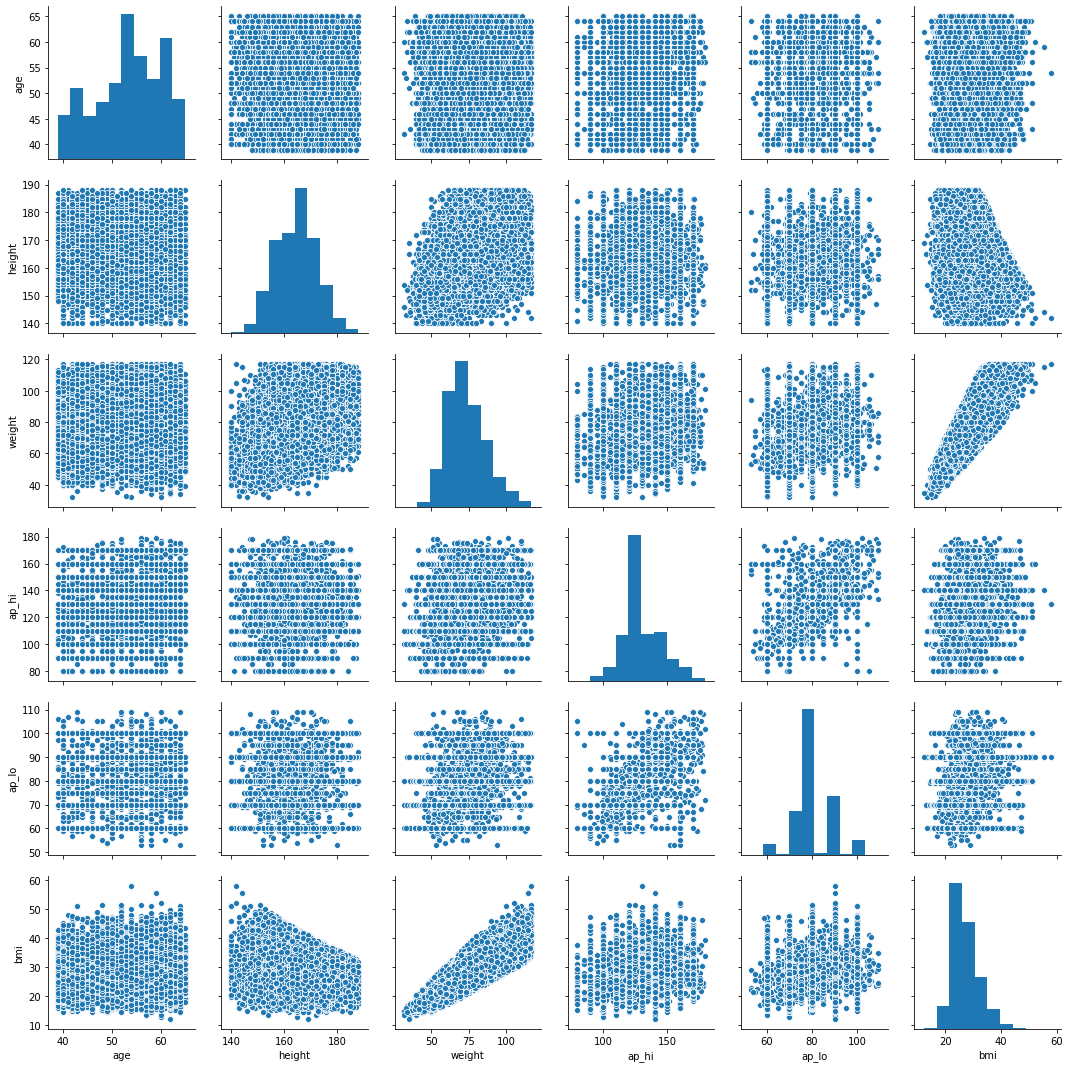

In [470]:
sns.pairplot(cardio[num_features])
#Заметим, что мультиколленеарности среди независимых переменных практически нет
#Также, все количественные переменные, исходя из графиков, имеют нормальное распределение. 

##### Выводы:
- Видно, что наибольшая по модулю корреляция (0,85) наблюдается между показателем веса и индексом массы человека, что логично, так как ИМТ расчитывается на основе показателя веса.
- Также, заметим, что одним из наиболее высоких коэффициентов корреляции (0,72) по модулю является корреляция между систолическим и диастолическим артериальными давлениями, что также является вполне логичным выводом. Давления имеют свойства подниматься и понижаться параллельно. 
- Между показателями роста и веса человека также наблюдается умеренная прямая зависимость (0,32). 
- Показатель возраста также напрямую влияет на показатели сист. и диаст. артериальных давлений (0,22 и 0,16, соответственно).

###### Посколько часть показателей в датасете является категориальными переменными, интересно проанализировать влияние между этими переменными на количественные, а также изучить взаимосвязь независимых переменных и зависимой переменной ** наличия сердечно-сосудистых заболеваний**.


### Визуализация данных

Построим графики переменных для визуального представления о данных после предварительной обработки

In [ ]:
cat_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi']

In [477]:
#Насколько категориальные переменные влияют на значение показателя возраста пациента?
df_melted = pd.melt(cardio, id_vars='age', value_vars = cat_features)

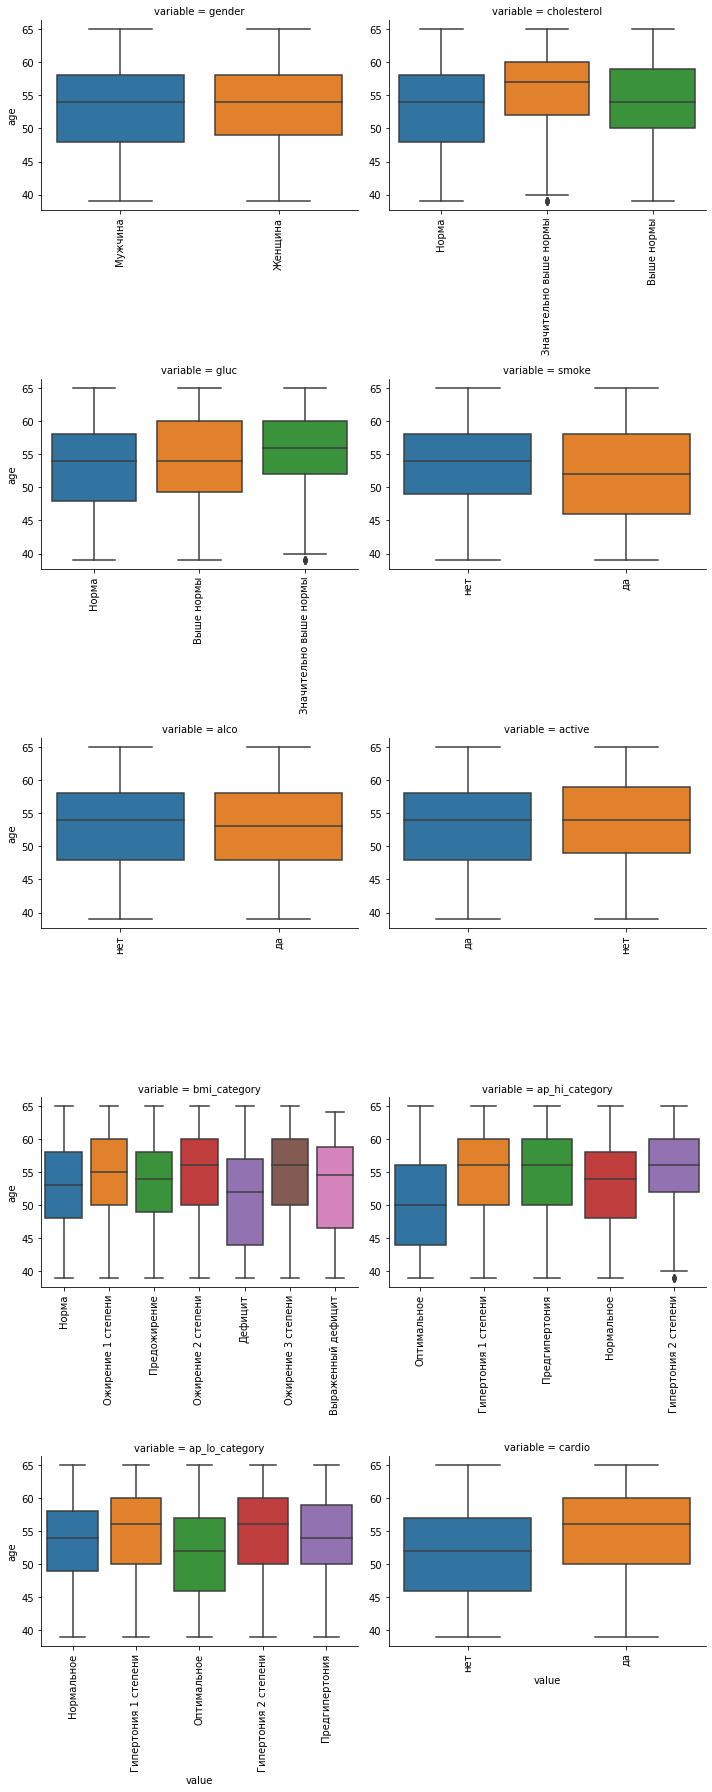

In [481]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
g = sns.FacetGrid(df_melted, col='variable',
                col_wrap=2, sharex=False, sharey=False, height = 5)
g.map(boxplot, 'value', 'age')

### Выводы (из графиков):
- Заметим, что целевая переменная наличия заболевания сильно зависит от показателя возраста. Средний возраст у пациентов с диагнозом выше, чем у здоровых.
- Оптимальное давление наблюдается у наиболее молодых пациентов в группе со средним возрастом 50 лет, при этом гипертония начинает развиваться у людей с 55 лет и страшне.
- Дефицит массы тела наблюдается также у молодых людей в возрасте около 50 лет, при этом особой зависимости между ожирением и возрастом человека не наблюдается. 
- Уровень глюкозы и холестирина становится выше нормы в возрастом и наблюдается чаще у лдей в возрасте от 57 лет. 

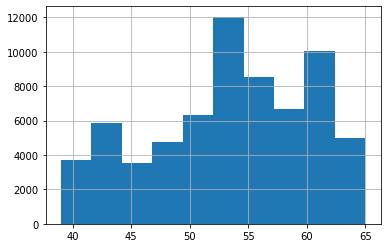

In [428]:
cardio['age'].hist()
#Заметим, что переменная возраста имеет нормальное распределение, наиболее встречающийся возраст - это 54-56 лет.

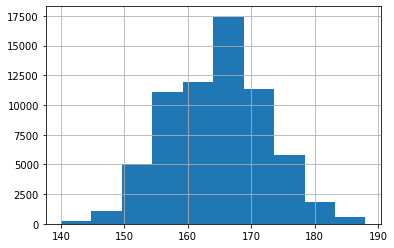

In [404]:
cardio['height'].hist()
#Переменная роста также имеет нормальное распределение, и наиболее часто встречающееся значение роста - это 165 см

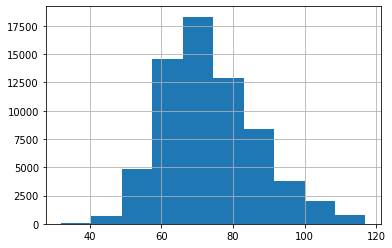

In [406]:
cardio['weight'].hist()
#Переменная веса также имеет нормальное распределение, и наиболее часто встречающееся значение роста - это 165 см

In [ ]:
cardio.groupby('bmi_category')['gender_category'].value_counts().unstack().plot(kind='bar')

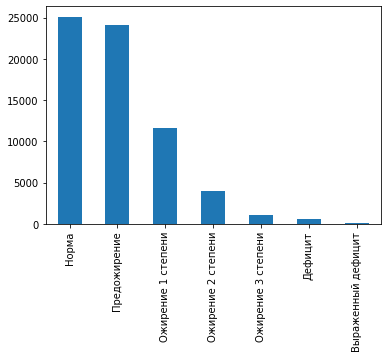

In [442]:
cardio['bmi_category'].value_counts().plot(kind='bar')

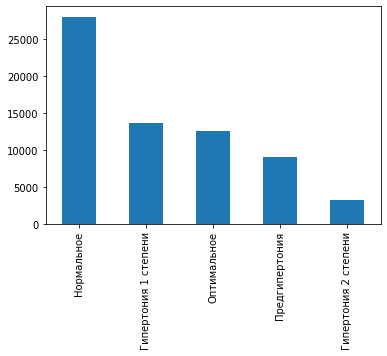

In [443]:
cardio['ap_hi_category'].value_counts().plot(kind='bar')

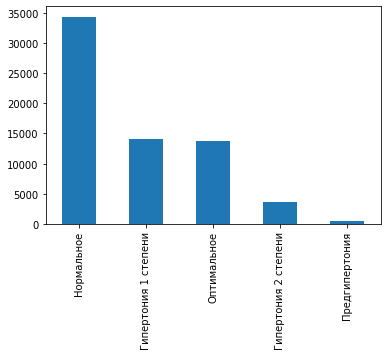

In [446]:
cardio['ap_lo_category'].value_counts().plot(kind='bar')

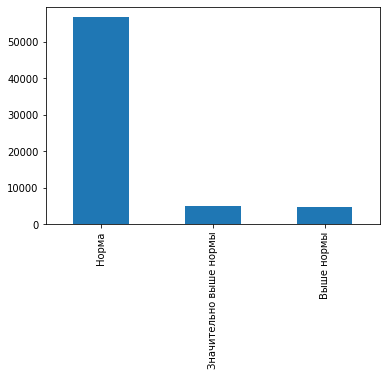

In [441]:
cardio['gluc'].value_counts().plot(kind='bar')

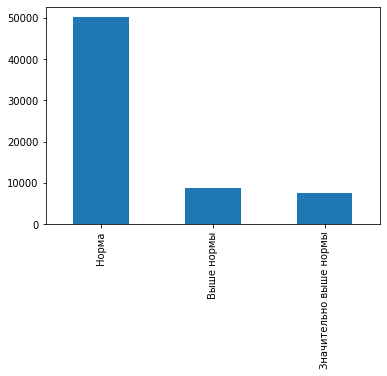

In [435]:
cardio['cholesterol'].value_counts().plot(kind='bar')

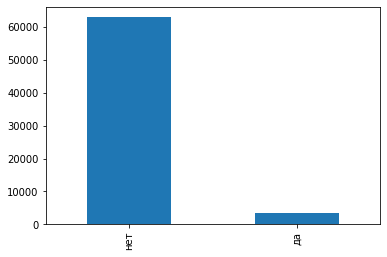

In [436]:
cardio['alco'].value_counts().plot(kind='bar')

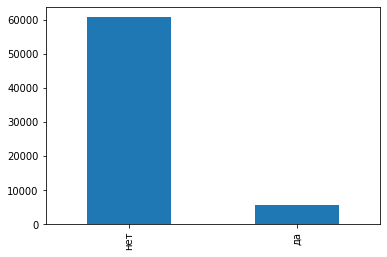

In [437]:
cardio['smoke'].value_counts().plot(kind='bar')

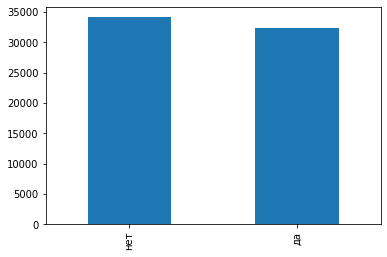

In [438]:
cardio['cardio'].value_counts().plot(kind='bar')

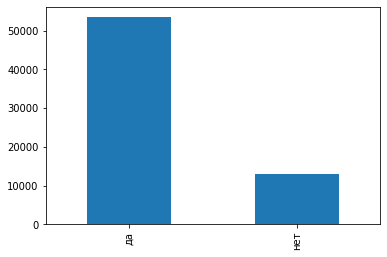

In [439]:
cardio['active'].value_counts().plot(kind='bar')

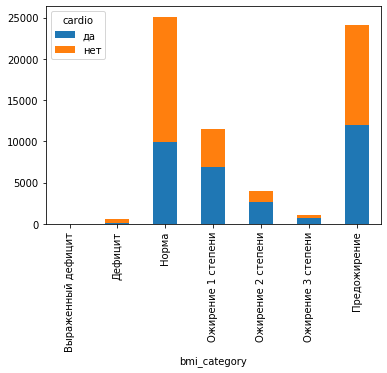

In [450]:
cardio.groupby('bmi_category')['cardio'].value_counts().unstack().plot(kind='bar', stacked=True)
#Заметим, что среди ИМТ, нахожящихся в норме, доля людей без сердечно-сосудистых заболеваний выше, чем с заболеваниями.
#В то же время у людей со диагностированной степенью ожирения 1-3 присутствуют заболевания в бОльшей степени.

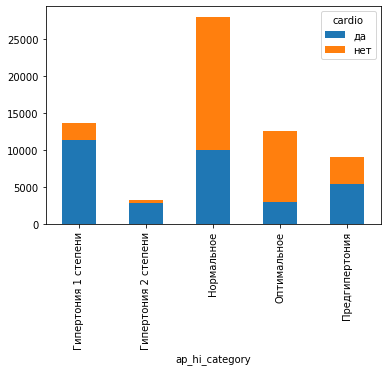

In [483]:
cardio.groupby('ap_hi_category')['cardio'].value_counts().unstack().plot(kind='bar', stacked=True)

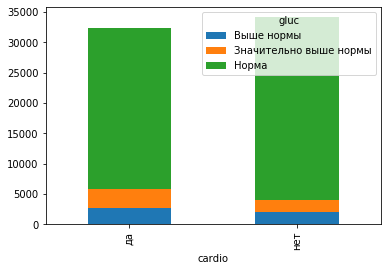

In [454]:
cardio.groupby('cardio')['gluc'].value_counts().unstack().plot(kind='bar', stacked=True)
#Заметим, что переменная оказывает слабое влияние на вероятность наличия сердечно-сосудистых заболеваний у человека.

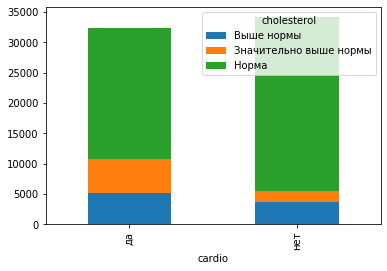

In [456]:
cardio.groupby('cardio')['cholesterol'].value_counts().unstack().plot(kind='bar', stacked=True)
#В то же время, у людей, у которых диагностировано заболевание сердца или сосудов, в бОльшей доле имеют повышенный холестирин. 

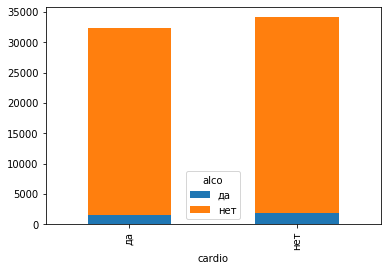

In [465]:
cardio.groupby('cardio')['alco'].value_counts().unstack().plot(kind='bar', stacked=True)
#Явная зависимость между наличием болезни и употреблением алкоголя не наблюдается

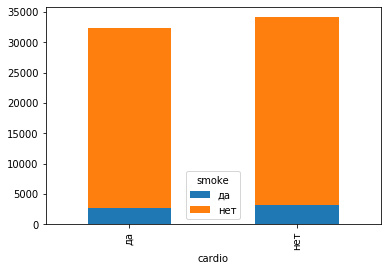

In [466]:
cardio.groupby('cardio')['smoke'].value_counts().unstack().plot(kind='bar', stacked=True)
#Явная зависимость между наличием болезни и курением не наблюдается

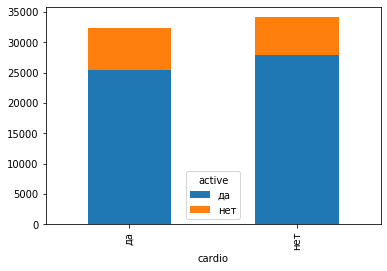

In [468]:
cardio.groupby('cardio')['active'].value_counts().unstack().plot(kind='bar', stacked=True)
#Стоит отметить, что большинство из опрошенных ведут активный образ жизни, одноко данный факт слабо влияет на диагноз. 
#Тем не менее влияние здорового образа жизни выше, чем отсутствие курения или употребления алкоголя.

### Выводы:
Из проведенного первичного анализа данных стоит отметить, что на зависимую переменную наличия или отсутсвия сердечно-сосудистых заболеваний у человека оказывают влияние все переменные в датасете, но в различной степени. 
Наиболее выраженная дифференциация людей по наличию заболевания заключается в наличие избыточного веса, наличие повышенного артериального давления, завышенные показатели уровней глюкозы и холестерина. При этом интересно, что наличие вредных привычек в виде курения и употребления алкоголя не оказывает влияние на показатель наличия болезни сердца и сосудов у человека. 

Исходя из того, что переменная **cardio** является бинарной переменной, для последующего функционального анализа зависимостей между переменными и оказания влияния на зависимую переменную будем использовать подходы машинного обучения ("классификация", "логистическая регрессия" и пр.) для выявления существенно значимых переменных на функциональном уровне.

В результате, первичный анализ позволил выявить на предварительном этапе взаимосвязи между переменными. Более того, мы провели очистку датасета от аномальных значений переменных. В итоге, из 70 000 наблюдений в нашем датасете осталось приблизительно 66 500 наблюдений (без выбросов и неадекватных значений). 